### Libraries

In [7]:
library(tuneR)
library(signal)
library(seewave)
library(wavelets)
library(lintr)
library(ggplot2)
library(plotly)
library(Rtsne)
library(pracma)
library(fields)
library(soundgen)
library(viridisLite)
library(stats)
library(fields)
library(dplyr)



Attaching package: ‘signal’


The following objects are masked from ‘package:stats’:

    filter, poly



Attaching package: ‘seewave’


The following object is masked from ‘package:signal’:

    unwrap



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:seewave’:

    export


The following object is masked from ‘package:signal’:

    filter


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout



Attaching package: ‘pracma’


The following object is masked from ‘package:seewave’:

    beep


The following objects are masked from ‘package:signal’:

    conv, ifft, interp1, pchip, polyval, roots


Loading required package: spam

Spam version 2.11-1 (2025-01-20) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtaine

In [5]:
plot_spectro <- function(spec_features){
  freq_bins <- 256
  time_bins <- 240
  spec_matrix <- matrix(as.numeric(spec_features), nrow = freq_bins, ncol = time_bins)

  custom_palette <- colorRampPalette(c("black", "blue", "cyan", "yellow", "red"))(100)

  image.plot(
    x = 1:time_bins,
    y = 1:freq_bins,
    z = t(spec_matrix),
    col = custom_palette,
    xlab = "Time",
    ylab = "Frequency",
    main = "Spectrogram",
    legend.lab = "Amplitude (dB)",
    legend.cex = 1
  )
}

plot_reconstructed_spectro <- function(reconstructed_features, num_components){
  # Reshape the reconstructed data
  freq_bins <- 256
  time_bins <- 240
  reconstructed_matrix <- matrix(reconstructed_features[1, ], nrow = freq_bins, ncol = time_bins)

  image.plot(
    x = 1:time_bins,
    y = 1:freq_bins,
    z = t(reconstructed_matrix),
    col = colorRampPalette(c("black", "blue", "cyan", "yellow", "red"))(100),
    xlab = "Time",
    ylab = "Frequency",
    main = paste("Reconstructed Spectrogram (Using", num_components, "PCs)"),
    legend.lab = "Amplitude (dB)"
  )
}


# Loading wav files

In [8]:
setwd("/home/baptiste/MASTER1/S2/DataMining/project/")


In [16]:
load_wav_files <- function(path = "./data/Propagation_experiments/individuals_propagation", pattern = "*.wav") {
  files <- list.files(path = path, pattern = pattern, full.names = TRUE, recursive = TRUE)
  audio_list <- list()

  for (file in files) {
    audio <- readWave(file)
    print(file)
    if (audio@stereo) {
      audio <- mono(audio, which = "left")
    }
    audio_list[[file]] <- audio
  }
  print("Files loaded.")
  return(audio_list)
}


### Propagation signals files

[1] "./data/Propagation_experiments/individuals_propagation/100_m/K_segment_12_100m.wav"
[1] "./data/Propagation_experiments/individuals_propagation/100_m/K_segment_2_100m.wav"
[1] "./data/Propagation_experiments/individuals_propagation/100_m/K_segment_22_100m.wav"
[1] "./data/Propagation_experiments/individuals_propagation/100_m/K_segment_32_100m.wav"
[1] "./data/Propagation_experiments/individuals_propagation/100_m/K_segment_42_100m.wav"
[1] "./data/Propagation_experiments/individuals_propagation/100_m/K_segment_52_100m.wav"
[1] "./data/Propagation_experiments/individuals_propagation/100_m/K_segment_62_100m.wav"
[1] "./data/Propagation_experiments/individuals_propagation/100_m/K_segment_72_100m.wav"
[1] "./data/Propagation_experiments/individuals_propagation/100_m/K_segment_82_100m.wav"
[1] "./data/Propagation_experiments/individuals_propagation/100_m/K_segment_92_100m.wav"
[1] "./data/Propagation_experiments/individuals_propagation/100_m/L_segment_13_100m.wav"
[1] "./data/Propagatio

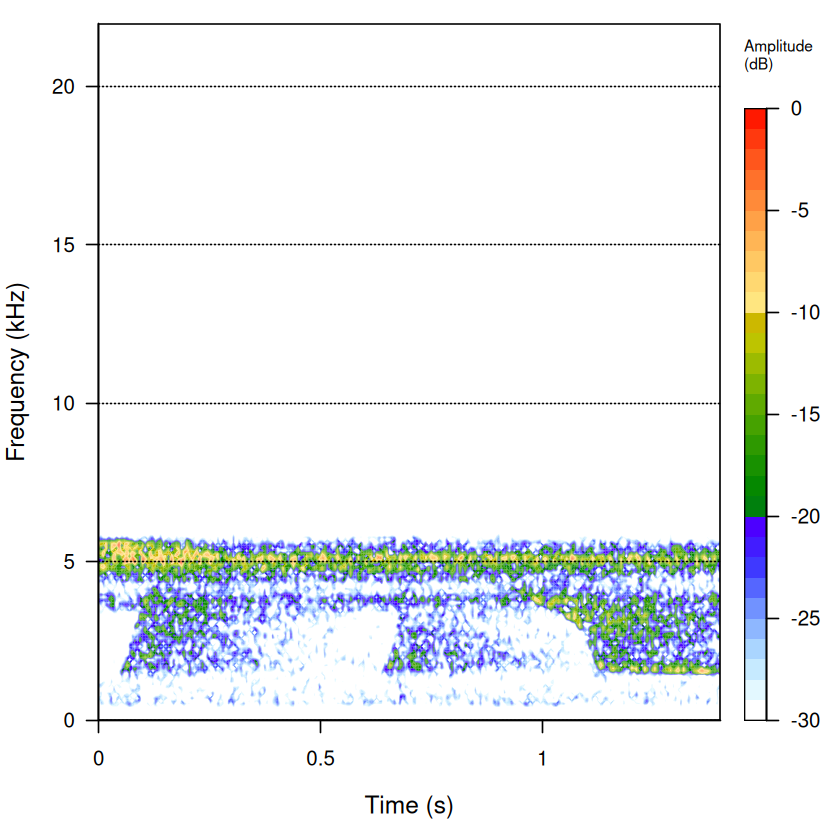

In [17]:

audio_list <- load_wav_files()

audio <- audio_list[[1]]
sr <- audio@samp.rate
spec <- spectro(audio, plot = TRUE, f = sr, ovlp = 50, wl = 512)
freq_bins <- nrow(spec$amp)
time_bins <- ncol(spec$amp)
print(freq_bins)
print(time_bins)


### Noise files

[1] "./data/Propagation_experiments/noise_propagation/noise_100_m/K_noise_12_100m.wav"
[1] "./data/Propagation_experiments/noise_propagation/noise_100_m/K_noise_2_100m.wav"
[1] "./data/Propagation_experiments/noise_propagation/noise_100_m/K_noise_22_100m.wav"
[1] "./data/Propagation_experiments/noise_propagation/noise_100_m/K_noise_32_100m.wav"
[1] "./data/Propagation_experiments/noise_propagation/noise_100_m/K_noise_42_100m.wav"
[1] "./data/Propagation_experiments/noise_propagation/noise_100_m/K_noise_52_100m.wav"
[1] "./data/Propagation_experiments/noise_propagation/noise_100_m/K_noise_62_100m.wav"
[1] "./data/Propagation_experiments/noise_propagation/noise_100_m/K_noise_72_100m.wav"
[1] "./data/Propagation_experiments/noise_propagation/noise_100_m/K_noise_82_100m.wav"
[1] "./data/Propagation_experiments/noise_propagation/noise_100_m/K_noise_92_100m.wav"
[1] "./data/Propagation_experiments/noise_propagation/noise_100_m/L_noise_13_100m.wav"
[1] "./data/Propagation_experiments/noise_pr

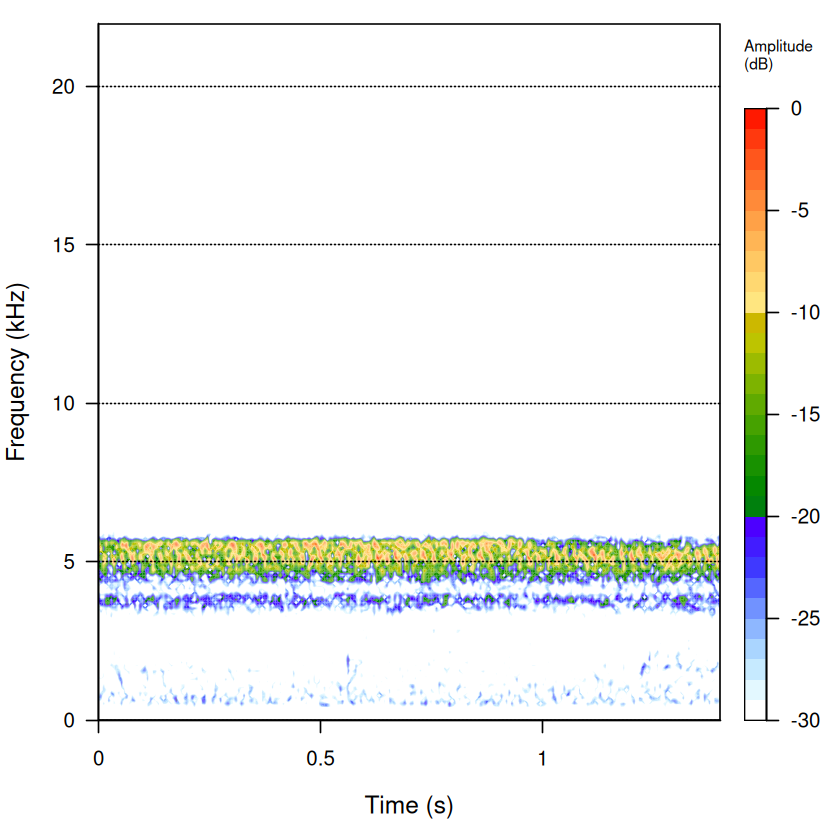

In [11]:
noise_list <- load_wav_files(path = "./data/Propagation_experiments/noise_propagation")

noise <- noise_list[[1]]
sr <- noise@samp.rate
spec <- spectro(noise, plot = TRUE, f = sr, ovlp = 50, wl = 512)
noise_freq_bins <- nrow(spec$amp)
noise_time_bins <- ncol(spec$amp)
print(noise_freq_bins)
print(noise_time_bins)



### Synthetic files

[1] "./data/Propagation_experiments/synthetic_files/K_segment_12.wav"
[1] "./data/Propagation_experiments/synthetic_files/K_segment_2.wav"
[1] "./data/Propagation_experiments/synthetic_files/K_segment_22.wav"
[1] "./data/Propagation_experiments/synthetic_files/K_segment_32.wav"
[1] "./data/Propagation_experiments/synthetic_files/K_segment_42.wav"
[1] "./data/Propagation_experiments/synthetic_files/K_segment_52.wav"
[1] "./data/Propagation_experiments/synthetic_files/K_segment_62.wav"
[1] "./data/Propagation_experiments/synthetic_files/K_segment_72.wav"
[1] "./data/Propagation_experiments/synthetic_files/K_segment_82.wav"
[1] "./data/Propagation_experiments/synthetic_files/K_segment_92.wav"
[1] "./data/Propagation_experiments/synthetic_files/L_segment_13.wav"
[1] "./data/Propagation_experiments/synthetic_files/L_segment_23.wav"
[1] "./data/Propagation_experiments/synthetic_files/L_segment_3.wav"
[1] "./data/Propagation_experiments/synthetic_files/L_segment_33.wav"
[1] "./data/Propagatio

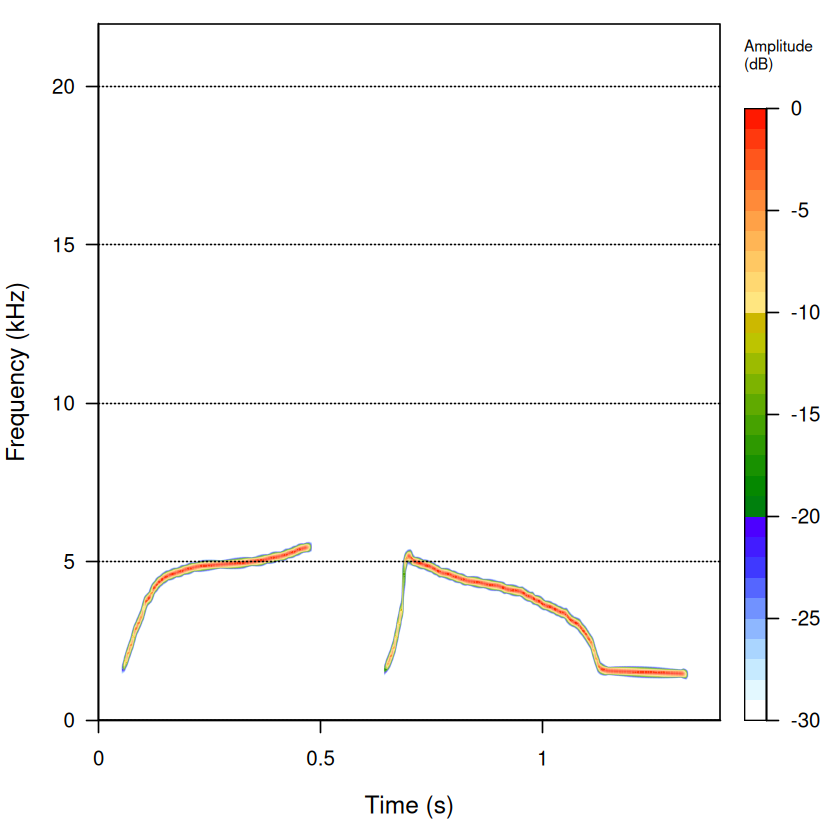

In [18]:
synthetic_list <- load_wav_files(path = "./data/Propagation_experiments/synthetic_files")

synthetic <- synthetic_list[[1]]
sr <- synthetic@samp.rate
spec <- spectro(synthetic, plot = TRUE, f = sr, ovlp = 50, wl = 512)
noise_freq_bins <- nrow(spec$amp)
noise_time_bins <- ncol(spec$amp)
print(noise_freq_bins)
print(noise_time_bins)


# Extracting features

### Extracting the spectrograms

In [13]:
process_audio_list <- function(audio_list) {
  data_list <- list()

  for (file in names(audio_list)) {
    audio <- audio_list[[file]]
    sr <- audio@samp.rate

    spec <- spectro(audio, f = sr, plot = FALSE, ovlp = 50, wl = 512)

    spec_matrix <- spec$amp

    # Extract the label
    file_name <- basename(file)
    parts <- unlist(strsplit(file_name, "_"))
    individual <- parts[1]
    distance <- sub("\\m.wav$", "", parts[length(parts)])

    # Store the spectro
    data_list[[file]] <- c(spec_matrix, individual, distance)
  }

  df <- as.data.frame(do.call(rbind, data_list))
  
  # Add the column names for the spectrogram features + the labels
  num_spec_features <- length(as.vector(spec_matrix))
  colnames(df) <- c(paste0("SpecFeature", 1:num_spec_features), "Individual", "Distance")

  df[, 1:num_spec_features] <- lapply(df[, 1:num_spec_features], as.numeric)
  
  return(df)
}


### Loading and saving into a dataframe

In [18]:
df <- process_audio_list(audio_list)


In [ ]:
noise_df <- process_audio_list(noise_list)


In [109]:
synthetic_df <- process_audio_list(synthetic_list)
synthetic_df$Distance <- NULL

# Adding noise in the -inf parts of the spectrograms
synthetic_df[sapply(synthetic_df, is.numeric)] <- lapply(synthetic_df[sapply(synthetic_df, is.numeric)], function(x) {
  x[is.infinite(x) | is.na(x)] <- runif(sum(is.infinite(x) | is.na(x)), min = -115, max = -95)
  return(x)
})


### Combining the Signal and Noise files into a single dataframe

In [ ]:
df$Type <- "Signal"
noise_df$Type <- "Noise"

combined_df <- rbind(df, noise_df)
saveRDS(combined_df, "./data/Propagation_experiments/df.rds")


In [67]:
combined_df <- readRDS("./data/Propagation_experiments/df.rds")


In [68]:
spec_features <- as.matrix(combined_df[, 1:(ncol(combined_df) - 3)])
pca_result <- prcomp(spec_features, center = TRUE, scale. = TRUE)

summary(pca_result)


Importance of components:
                            PC1      PC2      PC3      PC4      PC5      PC6
Standard deviation     205.1242 47.26465 28.67194 17.50446 14.11191 13.54303
Proportion of Variance   0.6848  0.03636  0.01338  0.00499  0.00324  0.00299
Cumulative Proportion    0.6848  0.72119  0.73457  0.73956  0.74280  0.74578
                            PC7     PC8     PC9    PC10    PC11    PC12    PC13
Standard deviation     11.25469 9.30727 9.20114 8.35094 7.81707 7.37344 7.25321
Proportion of Variance  0.00206 0.00141 0.00138 0.00114 0.00099 0.00088 0.00086
Cumulative Proportion   0.74784 0.74925 0.75063 0.75177 0.75276 0.75365 0.75450
                          PC14    PC15    PC16    PC17    PC18    PC19    PC20
Standard deviation     7.10747 7.03390 6.93903 6.71908 6.44586 6.27533 6.12307
Proportion of Variance 0.00082 0.00081 0.00078 0.00073 0.00068 0.00064 0.00061
Cumulative Proportion  0.75533 0.75613 0.75691 0.75765 0.75833 0.75897 0.75958
                          PC21

In [69]:
explained_variance <- cumsum(pca_result$sdev^2 / sum(pca_result$sdev^2))
num_components <- which.max(explained_variance >= 0.99999)

num_components


[1] 999

In [ ]:
pca_data <- pca_result$x[, 1:num_components]

pca_df <- as.data.frame(pca_data)
pca_df$Individual <- combined_df$Individual
pca_df$Distance <- combined_df$Distance
pca_df$Type <- combined_df$Type

saveRDS(pca_df, file = "./data/Propagation_experiments/df_pca.rds")


Warning message in matrix(as.numeric(spec_features), nrow = freq_bins, ncol = time_bins):
“NAs introduced by coercion”
Warning message in matrix(as.numeric(spec_features), nrow = freq_bins, ncol = time_bins):
“data length [61442] is not a sub-multiple or multiple of the number of rows [256]”


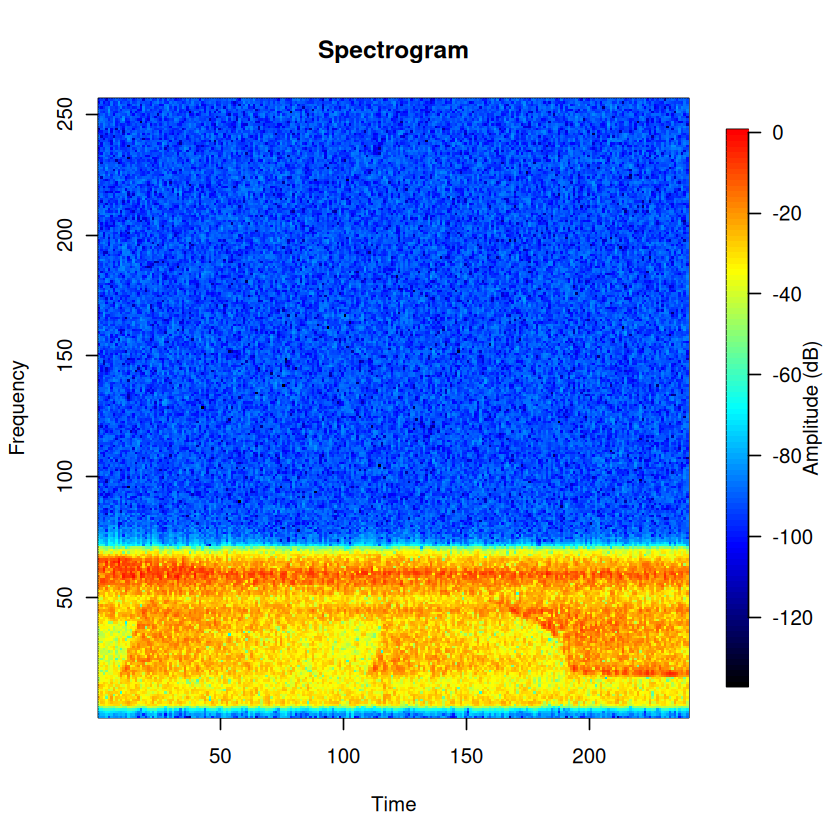

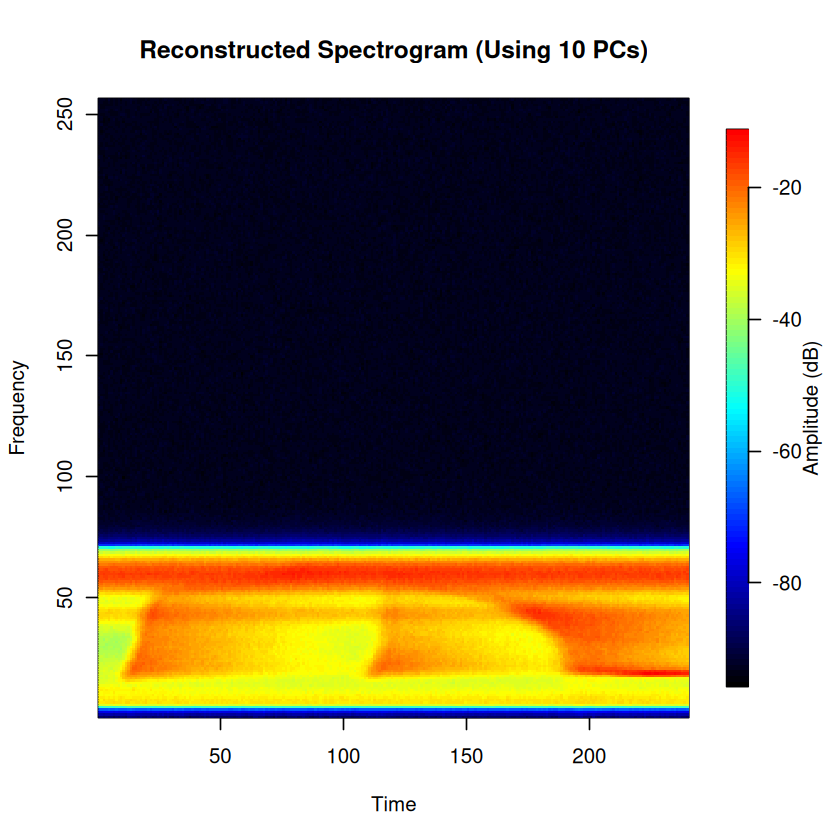

In [70]:
num_spectro <- 1
spectrogram <- combined_df[num_spectro, ]
spec_features <- spectrogram[1:(ncol(spectrogram) - 1)]

plot_spectro(spec_features)

num_components <- 10

pca_components <- pca_result$rotation
pca_score <- pca_result$x[num_spectro, 1:num_components]

reconstructed_features <- pca_score%*% t(pca_components[, 1:num_components])

if (!is.null(pca_result$scale)) {
  reconstructed_features <- scale(reconstructed_features, center = FALSE, scale = 1 / pca_result$scale)
}

if (!is.null(pca_result$center)) {
  reconstructed_features <- scale(reconstructed_features, center = -pca_result$center, scale = FALSE)
}

plot_reconstructed_spectro(reconstructed_features, num_components)


# Test using an autoencoder

In [ ]:
spectrogram_data <- combined_df %>% select(starts_with("SpecFeature"))

spectrogram_data <- as.data.frame(lapply(spectrogram_data, normalize))

spectrogram_matrix <- as.matrix(spectrogram_data)


ERROR: Error: unable to find an inherited method for function ‘normalize’ for signature ‘object = "numeric"’


In [ ]:
library(reticulate)
library(keras)

use_python("/home/baptiste/MASTER1/S2/DataMining/project/.venv/bin/python", required = TRUE)
py_config()
py_run_string("
import tensorflow as tf
# Set the number of threads for parallelism
tf.config.threading.set_inter_op_parallelism_threads(8)  # Number of CPUs for inter-op parallelism
tf.config.threading.set_intra_op_parallelism_threads(8)  # Number of CPUs for intra-op parallelism
print('TensorFlow version:', tf.__version__)
")
input_shape <- c(ncol(spectrogram_data))

input_layer <- layer_input(shape = input_shape, name = "input")
encoder_1 <- layer_dense(units = 128, activation = "relu", name = "encoder_1")(input_layer)
encoder_2 <- layer_dense(units = 64, activation = "relu", name = "encoder_2")(encoder_1)
encoded <- layer_dense(units = 32, activation = "relu", name = "encoded")(encoder_2)
decoder_1 <- layer_dense(units = 64, activation = "relu", name = "decoder_1")(encoded)
decoder_2 <- layer_dense(units = 128, activation = "relu", name = "decoder_2")(decoder_1)
decoded <- layer_dense(units = input_shape[1], activation = "sigmoid", name = "decoded")(decoder_2)

autoencoder <- keras_model(inputs = input_layer, outputs = decoded)

keras:::compile.keras.engine.training.Model(
  autoencoder,
  optimizer = "adam",
  loss = "mse"
)

summary(autoencoder)


python:         /home/baptiste/MASTER1/S2/DataMining/project/.venv/bin/python
libpython:      /usr/lib/python3.11/config-3.11-x86_64-linux-gnu/libpython3.11.so
pythonhome:     /home/baptiste/MASTER1/S2/DataMining/project/.venv:/home/baptiste/MASTER1/S2/DataMining/project/.venv
version:        3.11.11 (main, Dec  4 2024, 08:55:08) [GCC 13.2.0]
numpy:          /home/baptiste/MASTER1/S2/DataMining/project/.venv/lib/python3.11/site-packages/numpy
numpy_version:  2.0.2
tensorflow:     /home/baptiste/MASTER1/S2/DataMining/project/.venv/lib/python3.11/site-packages/tensorflow

NOTE: Python version was forced by use_python() function

<Functional name=functional_6, built=True>


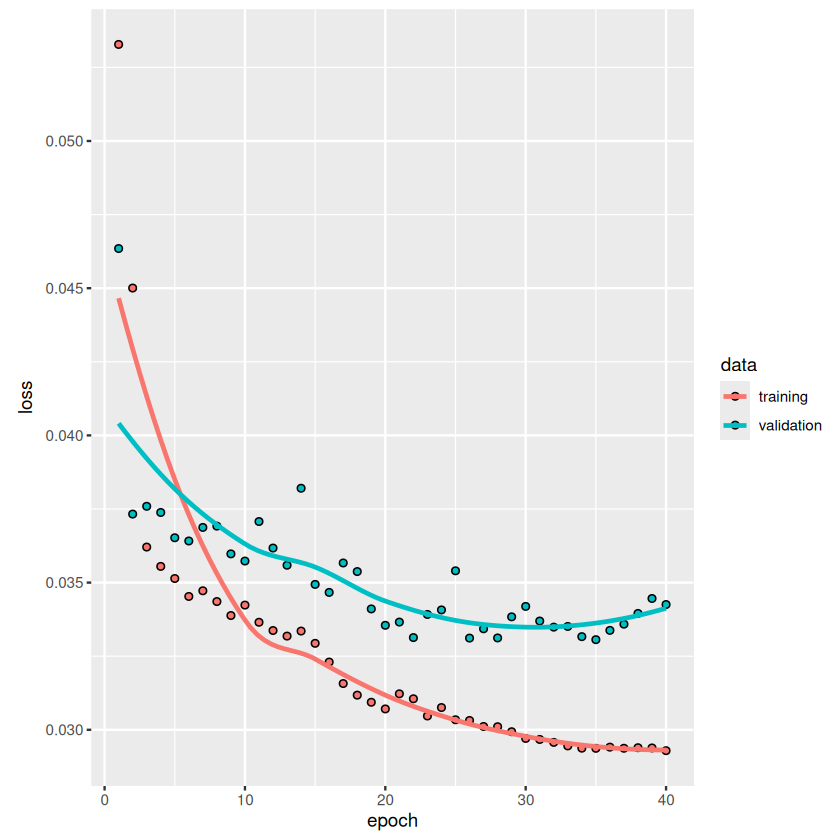

In [ ]:
history <- keras:::fit.keras.engine.training.Model(
  autoencoder,
  x = spectrogram_matrix,
  y = spectrogram_matrix,
  epochs = 40,
  batch_size = 32,
  validation_split = 0.2,
  verbose = 1
)

plot(history)


In [ ]:
reconstructed_data <- keras:::predict.keras.engine.training.Model(autoencoder, spectrogram_matrix)

encoder_model <- keras_model(inputs = input_layer, outputs = encoded)
latent_data <- keras:::predict.keras.engine.training.Model(encoder_model, spectrogram_matrix)

print("Original data dimensions:")
dim(spectrogram_matrix)
print("Reconstructed data dimensions:")
dim(reconstructed_data)
print("Latent data dimensions:")
dim(latent_data)


[1] "Original data dimensions:"


[1]   100 61440

[1] "Reconstructed data dimensions:"


[1]   100 61440

[1] "Latent data dimensions:"


[1] 100  32

Performing PCA
Read the 100 x 32 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.01 seconds (sparsity = 0.973800)!
Learning embedding...
Iteration 50: error is 46.055130 (50 iterations in 0.02 seconds)
Iteration 100: error is 46.117464 (50 iterations in 0.02 seconds)
Iteration 150: error is 46.026353 (50 iterations in 0.02 seconds)
Iteration 200: error is 47.322430 (50 iterations in 0.02 seconds)
Iteration 250: error is 48.241383 (50 iterations in 0.02 seconds)
Iteration 300: error is 1.157936 (50 iterations in 0.01 seconds)
Iteration 350: error is 0.262618 (50 iterations in 0.01 seconds)
Iteration 400: error is 0.078248 (50 iterations in 0.01 seconds)
Iteration 450: error is 0.048119 (50 iterations in 0.01 seconds)
Iteration 500: error is 0.049350 (50 iterations in 0.01 seconds)
Iteration 550: error is 0.052677 (50 iterations in 0.01 seconds)
Iteration 600

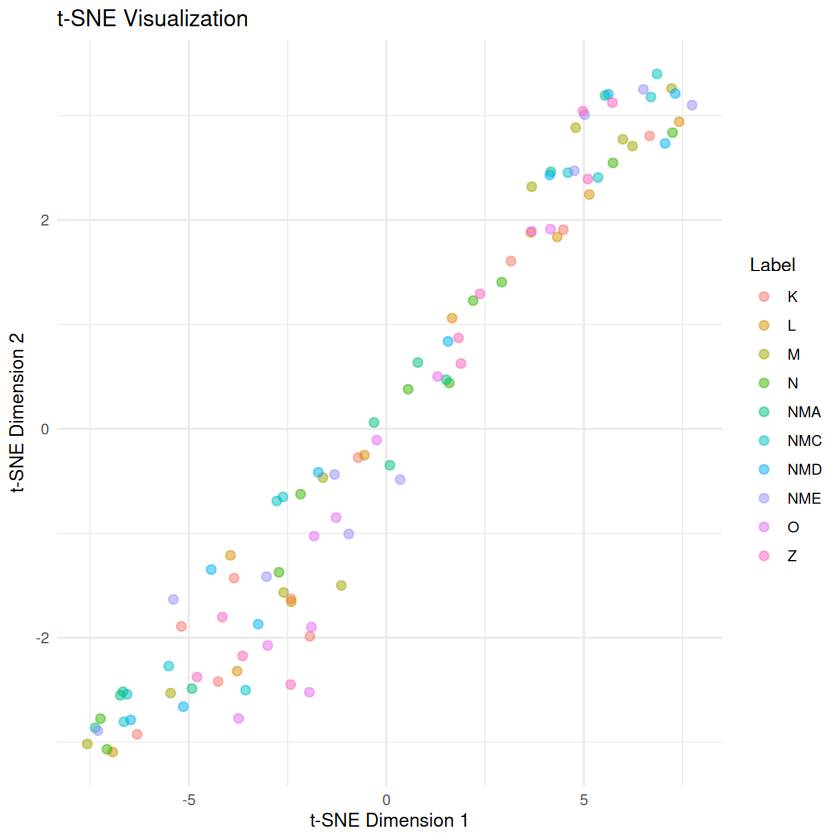

In [ ]:
set.seed(42)
tsne_result <- Rtsne(latent_data, dims = 2, perplexity = 30, verbose = TRUE)

latent_df <- data.frame(
  X = tsne_result$Y[, 1],
  Y = tsne_result$Y[, 2]
)

latent_df$Label <- df_12_5$Individual
ggplot(latent_df, aes(x = X, y = Y, color = Label)) +
    geom_point(alpha = 0.5, size = 2) +
    labs(title = "t-SNE Visualization",
         x = "t-SNE Dimension 1",
         y = "t-SNE Dimension 2") +
    theme_minimal()




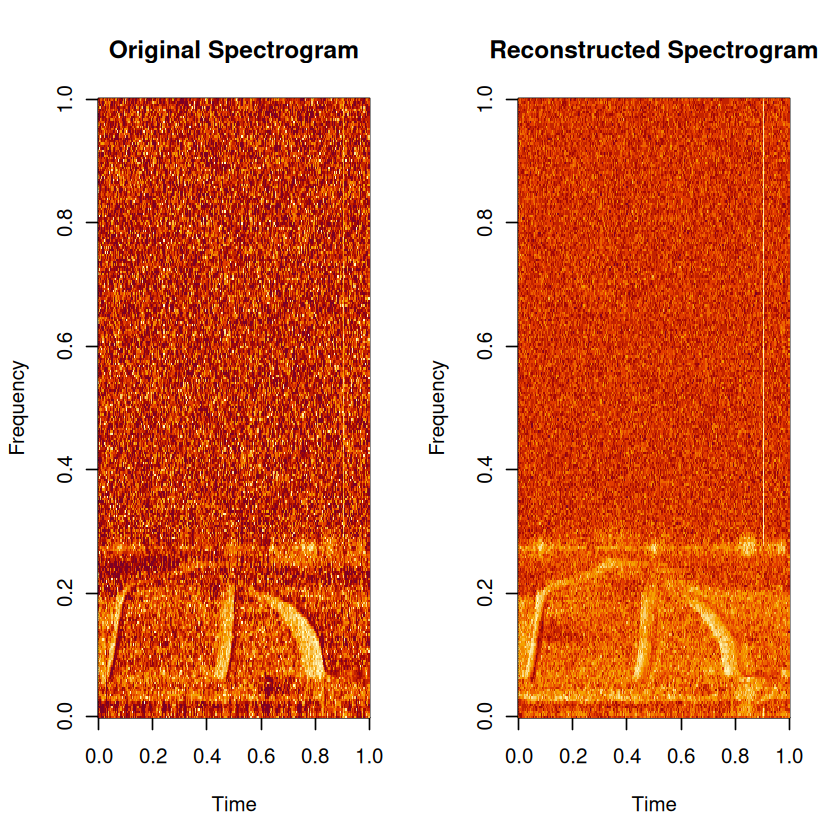

In [ ]:
reconstructed_data <- keras:::predict.keras.engine.training.Model(autoencoder, spectrogram_matrix)

time_bins <- time_bins
freq_bins <- freq_bins

original_sample <- matrix(spectrogram_matrix[60, ], nrow = freq_bins, ncol = time_bins)
reconstructed_sample <- matrix(reconstructed_data[60, ], nrow = freq_bins, ncol = time_bins)

par(mfrow = c(1, 2))
image(t(original_sample), main = "Original Spectrogram", xlab = "Time", ylab = "Frequency")
image(t(reconstructed_sample), main = "Reconstructed Spectrogram", xlab = "Time", ylab = "Frequency")


In [ ]:
latent_data <- as.data.frame(latent_data)
latent_data$Individual <- df_12_5$Individual
latent_data$Distance <- df_12_5$Distance
saveRDS(latent_data, "./data/Propagation_experiments/df_autoencoder_12_5.rds")


## Creating a dataframe for the synthetic files

In [110]:
saveRDS(synthetic_df, "./data/Propagation_experiments/synthetic_df.rds")


In [11]:
synthetic_df <- readRDS("./data/Propagation_experiments/synthetic_df.rds")


In [3]:
spec_features_synthetic <- as.matrix(synthetic_df[, 1:(ncol(synthetic_df) - 1)])

pca_synthetic <- prcomp(spec_features_synthetic, center = TRUE, scale. = TRUE)

summary(pca_synthetic)


Importance of components:
                            PC1      PC2      PC3      PC4      PC5      PC6
Standard deviation     49.84343 43.07430 36.57567 34.93553 33.08935 31.76409
Proportion of Variance  0.04044  0.03020  0.02177  0.01986  0.01782  0.01642
Cumulative Proportion   0.04044  0.07063  0.09241  0.11227  0.13009  0.14652
                            PC7      PC8      PC9     PC10     PC11     PC12
Standard deviation     30.48993 30.29092 29.82825 29.40368 28.77940 28.20077
Proportion of Variance  0.01513  0.01493  0.01448  0.01407  0.01348  0.01294
Cumulative Proportion   0.16165  0.17658  0.19106  0.20513  0.21861  0.23156
                           PC13     PC14     PC15     PC16     PC17     PC18
Standard deviation     27.95405 27.41092 27.06703 26.82372 26.67264 26.53387
Proportion of Variance  0.01272  0.01223  0.01192  0.01171  0.01158  0.01146
Cumulative Proportion   0.24428  0.25651  0.26843  0.28014  0.29172  0.30318
                           PC19     PC20     PC21 

Warning message in matrix(as.numeric(spec_features), nrow = freq_bins, ncol = time_bins):
“NAs introduced by coercion”
Warning message in matrix(as.numeric(spec_features), nrow = freq_bins, ncol = time_bins):
“data length [61441] is not a sub-multiple or multiple of the number of rows [256]”


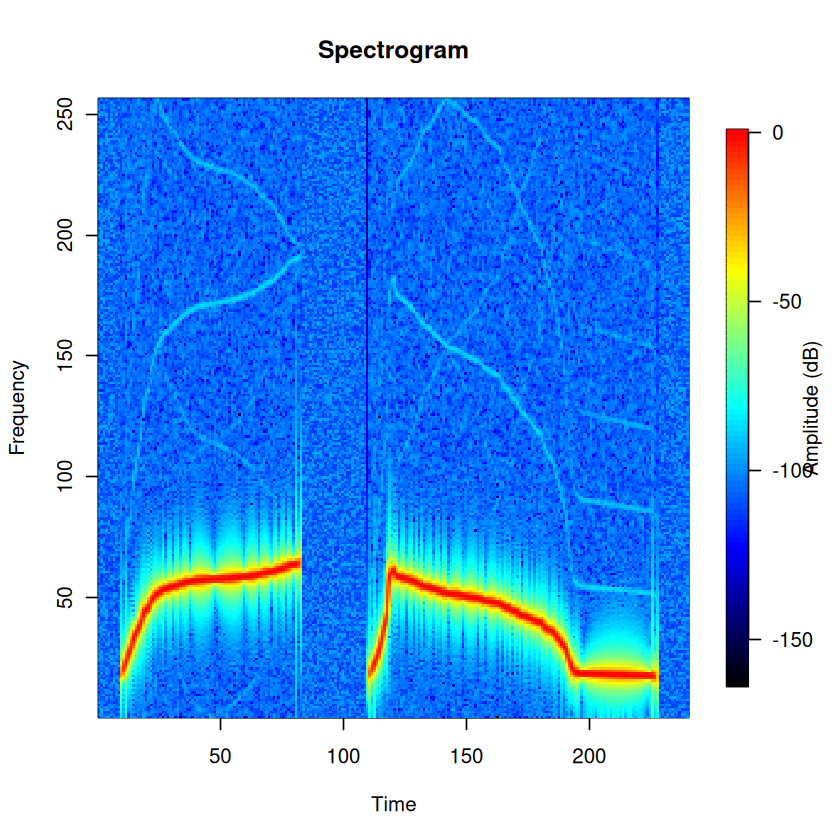

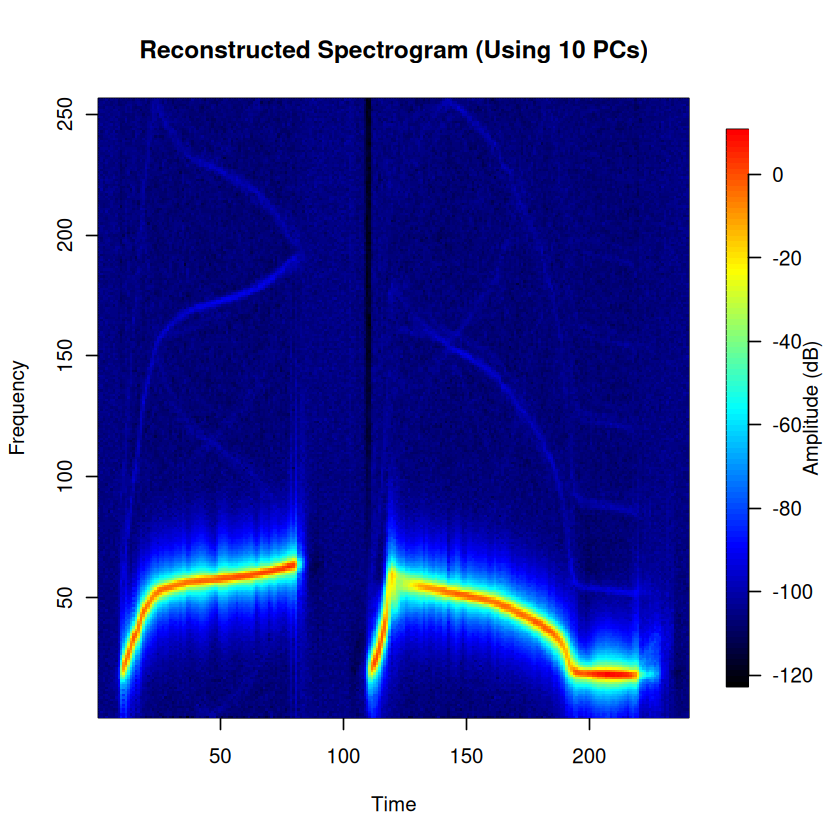

In [61]:
num_spectro <- 1
spectrogram <- synthetic_df[num_spectro, ]
spec_features <- spectrogram[1:(ncol(spectrogram) - 1)]

plot_spectro(spec_features)

num_components <- 10

pca_components <- pca_synthetic$rotation
pca_score <- pca_synthetic$x[num_spectro, 1:num_components]

reconstructed_features <- pca_score%*% t(pca_components[, 1:num_components])

if (!is.null(pca_synthetic$scale)) {
  reconstructed_features <- scale(reconstructed_features, center = FALSE, scale = 1 / pca_synthetic$scale)
}

if (!is.null(pca_synthetic$center)) {
  reconstructed_features <- scale(reconstructed_features, center = -pca_synthetic$center, scale = FALSE)
}

plot_reconstructed_spectro(reconstructed_features, num_components)


In [118]:
explained_variance <- cumsum(pca_synthetic$sdev^2 / sum(pca_synthetic$sdev^2))
num_components <- which.max(explained_variance >= 0.99999)

num_components

pca_data <- pca_synthetic$x[, 1:num_components]

pca_df <- as.data.frame(pca_data)
pca_df$Individual <- synthetic_df$Individual
pca_df$Distance <- synthetic_df$Distance

saveRDS(pca_df, file = "./data/Propagation_experiments/df_pca_synthetic.rds")



[1] 99

## Creating a dataframe for propagation signals + synthetic signal

In [36]:
synthetic_df$Distance <- 0

combined_df_signals <- rbind(df, synthetic_df)
saveRDS(combined_df_signals, "./data/Propagation_experiments/df_signals.rds")


In [ ]:
combined_df_signals <- readRDS("./data/Propagation_experiments/df_signals.rds")


In [64]:
spec_features <- as.matrix(combined_df_signals[, 1:(ncol(combined_df_signals) - 2)])
pca_signals <- prcomp(spec_features, center=TRUE, scale.=TRUE)

summary(pca_signals)


Importance of components:
                            PC1     PC2      PC3      PC4      PC5      PC6
Standard deviation     190.1571 93.5118 18.39216 16.46509 14.80554 13.97042
Proportion of Variance   0.5885  0.1423  0.00551  0.00441  0.00357  0.00318
Cumulative Proportion    0.5885  0.7309  0.73637  0.74078  0.74435  0.74752
                            PC7      PC8      PC9    PC10   PC11    PC12
Standard deviation     12.17184 11.06120 10.23816 9.64425 8.9369 8.91735
Proportion of Variance  0.00241  0.00199  0.00171 0.00151 0.0013 0.00129
Cumulative Proportion   0.74994  0.75193  0.75363 0.75515 0.7564 0.75774
                          PC13   PC14    PC15    PC16    PC17    PC18    PC19
Standard deviation     8.74018 8.2091 8.02684 7.72110 7.59890 7.46650 7.31722
Proportion of Variance 0.00124 0.0011 0.00105 0.00097 0.00094 0.00091 0.00087
Cumulative Proportion  0.75898 0.7601 0.76113 0.76210 0.76304 0.76395 0.76482
                          PC20    PC21    PC22    PC23    PC24    

In [38]:
explained_variance <- cumsum(pca_signals$sdev^2 / sum(pca_signals$sdev^2))
num_components <- which.max(explained_variance >= 0.9999999)

num_components

pca_data <- pca_signals$x[, 1:num_components]

pca_df <- as.data.frame(pca_data)
pca_df$Individual <- combined_df_signals$Individual
pca_df$Distance <- combined_df_signals$Distance

saveRDS(pca_df,file = "./data/Propagation_experiments/df_signals_pca.rds")


[1] 599

Warning message in matrix(as.numeric(spec_features), nrow = freq_bins, ncol = time_bins):
“NAs introduced by coercion”
Warning message in matrix(as.numeric(spec_features), nrow = freq_bins, ncol = time_bins):
“data length [61441] is not a sub-multiple or multiple of the number of rows [256]”


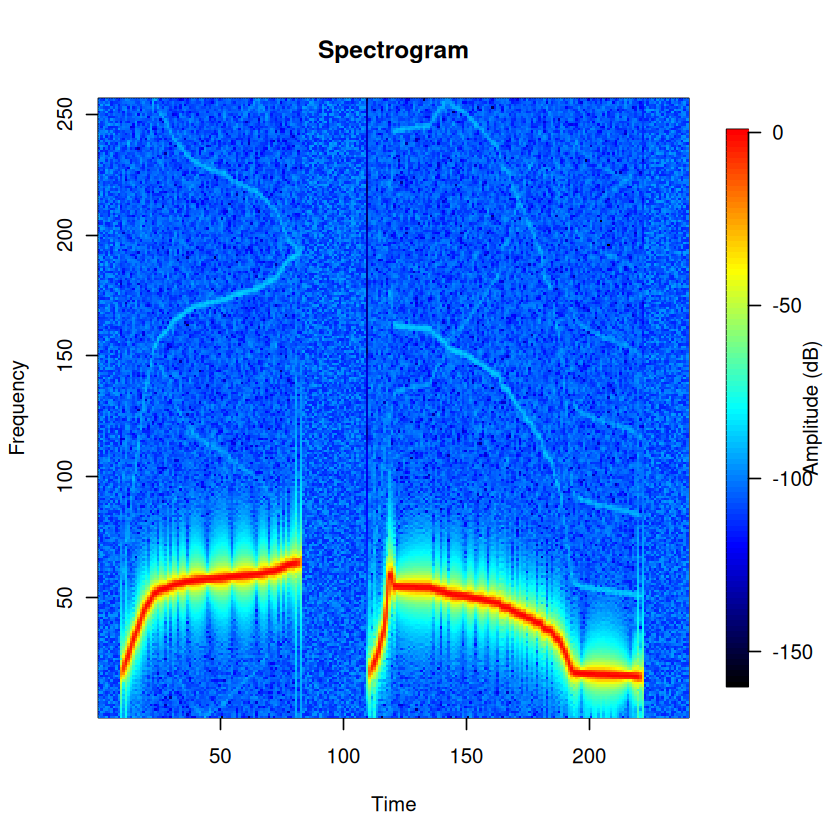

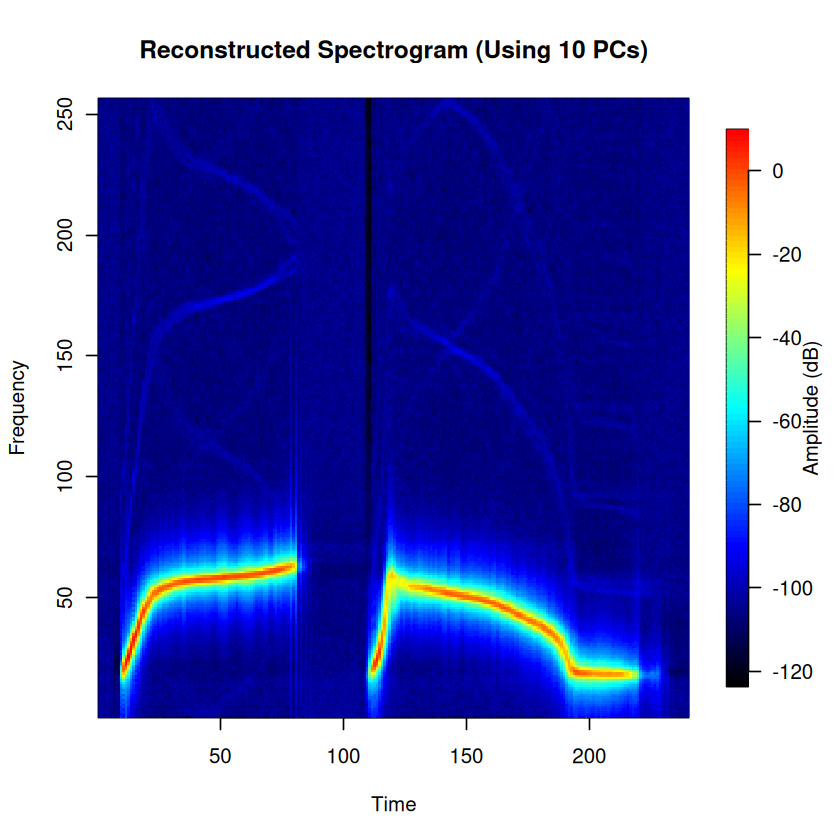

In [65]:
num_spectro <- 505
spectrogram <- combined_df_signals[num_spectro, ]
spec_features <- spectrogram[1:(ncol(spectrogram) - 1)]

plot_spectro(spec_features)

num_components <- 10

pca_components <- pca_signals$rotation
pca_score <- pca_signals$x[num_spectro, 1:num_components]

reconstructed_features <- pca_score%*% t(pca_components[, 1:num_components])

if (!is.null(pca_signals$scale)) {
  reconstructed_features <- scale(reconstructed_features, center = FALSE, scale = 1 / pca_signals$scale)
}

if (!is.null(pca_signals$center)) {
  reconstructed_features <- scale(reconstructed_features, center = -pca_signals$center, scale = FALSE)
}

plot_reconstructed_spectro(reconstructed_features, num_components)
